In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [78]:
# Load the dataset into a DataFrame
data = pd.read_csv("kidney_disease.csv")

In [102]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [79]:
# Check for missing values
missing_values = data.isnull().sum()

In [80]:
# Create an imputer object with strategy='mean' to impute missing values with mean
imputer = SimpleImputer(strategy='mean')

In [81]:
# Impute missing values for numerical columns
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[num_columns] = imputer.fit_transform(data[num_columns])

In [82]:
# Impute missing values for categorical columns 
cat_columns = data.select_dtypes(include=['object']).columns
for col in cat_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [83]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=cat_columns)

In [84]:
# Initialize a StandardScaler object
scaler = StandardScaler()

In [85]:
# Scale numerical features
data_scaled = scaler.fit_transform(data_encoded[num_columns])

In [86]:
# Replace original numerical columns with scaled values
data_encoded[num_columns] = data_scaled

In [87]:
# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop(columns=['classification_ckd', 'classification_ckd\t', 'classification_notckd'], axis=1)
y = data_encoded['classification_ckd']

In [88]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Initialize a DecisionTreeClassifier object
dt_model = DecisionTreeClassifier(random_state=42)

In [90]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
# Predict the target variable for the testing set
y_pred_dt = dt_model.predict(X_test)

In [92]:
# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.9875


In [93]:
# Display the classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98        28
        True       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [94]:
# Calculate the accuracy and the inverse of the accuracy
accuracy_value_dt = accuracy_score(y_test, y_pred_dt)
inaccuracy_value_dt = 1 - accuracy_value_dt

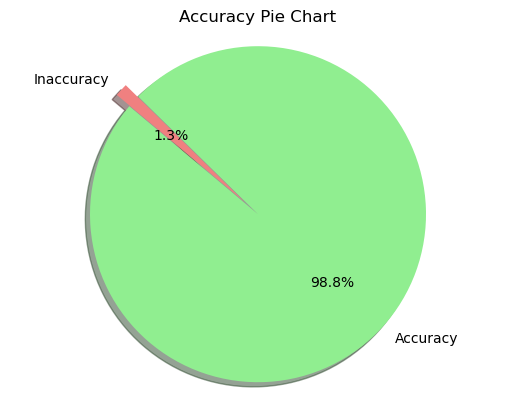

In [95]:
# Plot the pie chart
labels = ['Accuracy', 'Inaccuracy']
sizes = [accuracy_value_dt, inaccuracy_value_dt]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (Accuracy)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Accuracy Pie Chart')
plt.show()

In [96]:
# Compare predicted labels with actual labels
correct_predictions_dt = (y_pred_dt == y_test)

In [97]:
# Print the indices of incorrect predictions
incorrect_indices_dt = [i for i, correct in enumerate(correct_predictions_dt) if not correct]
print("Indices of incorrect predictions:", incorrect_indices_dt)

Indices of incorrect predictions: [75]


In [98]:
# Print the actual and predicted labels for incorrect predictions
print("Incorrect predictions:")
for index in incorrect_indices_dt:
    print("Actual:", y_test.iloc[index], "\tPredicted:", y_pred_dt[index])

Incorrect predictions:
Actual: True 	Predicted: False


In [99]:
# Compare predicted labels with actual labels
correct_predictions_dt = (y_pred_dt == y_test)

In [100]:
# Print the indices of correct predictions
correct_indices_dt = [i for i, correct in enumerate(correct_predictions_dt) if correct]
print("Indices of correct predictions:", correct_indices_dt)

Indices of correct predictions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79]


In [101]:
# Print the actual and predicted labels for correct predictions
print("Correct predictions:")
for index in correct_indices_dt:
    print("Actual:", y_test.iloc[index], "\tPredicted:", y_pred_dt[index])

Correct predictions:
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: True
Actual: False 	Predicted: False
Actual: True 	Predicted: 